# Recommender System

        ~ recommends article's link based on NEWS topics

In [67]:
#libraries
import pandas as pd                                                 #for reading data


import nltk
nltk.download('stopwords')                                          # text pre-processing 
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
import string
from nltk.stem import PorterStemmer


import seaborn as sns                                               # for EDA
import matplotlib.pyplot as plt
from wordcloud import WordCloud


from sklearn.feature_extraction.text import TfidfVectorizer         #text vectorization
from sklearn.metrics.pairwise import cosine_similarity              # similarity 

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading Data

In [68]:
# import json
data=pd.read_json(r'E:\downloads\News_Category_Dataset_v3.json',lines=True)

In [69]:
#head
data.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [70]:
#df.shape
data.shape

(209527, 6)

# Train Test Split
**~ i am doing this because we have a huge dataset,if i try to take whole data,it will throw a Memory error**

In [71]:
from sklearn.model_selection import train_test_split
df,test=train_test_split(data,test_size=0.90,random_state=0)

# EDA
   **~ to get know about data**

In [72]:
# description of data
df.describe(include='O')

,link,headline,category,short_description,authors
count,20952,20952,20952,20952,20952
unique,20952,20893,42,18901,6208
top,https://www.huffingtonpost.com/entry/minnesota...,Sunday Roundup,POLITICS,,
freq,1,8,3650,1936,3761


In [73]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20952 entries, 94652 to 199340
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               20952 non-null  object        
 1   headline           20952 non-null  object        
 2   category           20952 non-null  object        
 3   short_description  20952 non-null  object        
 4   authors            20952 non-null  object        
 5   date               20952 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 1.1+ MB


In [74]:
# how many years of data we have
df.date.dt.year.unique()

array([2015, 2016, 2013, 2012, 2017, 2021, 2014, 2018, 2019, 2020, 2022],
      dtype=int64)

                we have 11 years of data from 2012 to 2022.

In [75]:
# No. of authors 
len(df.authors.unique())

6208

Text(0.5, 0.98, 'No. of articles in each categories ')

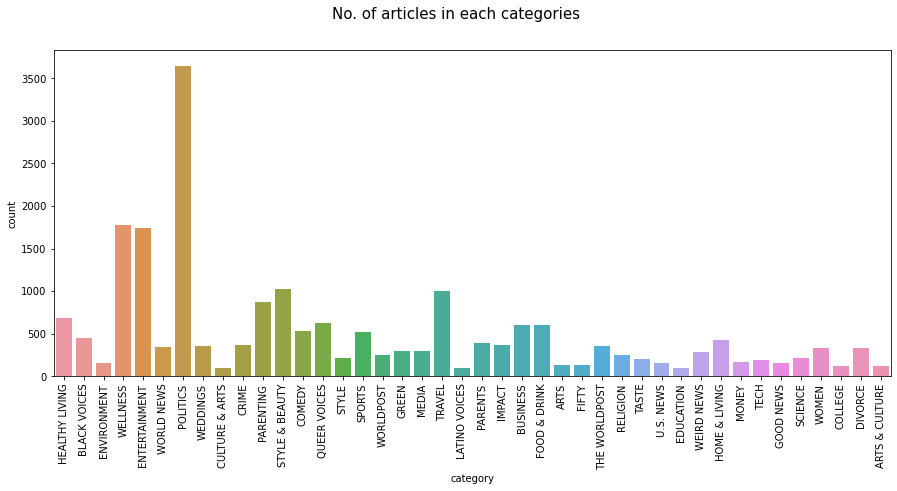

In [76]:
# No. of articles in each categories 
plt.figure(figsize=(15,6))
sns.countplot(df.category)
plt.xticks(rotation='vertical')
plt.suptitle('No. of articles in each categories ',fontsize=15)

            Most no. of articles or news are related to Politics.

Text(0.5, 0.98, 'Top 10 Authors')

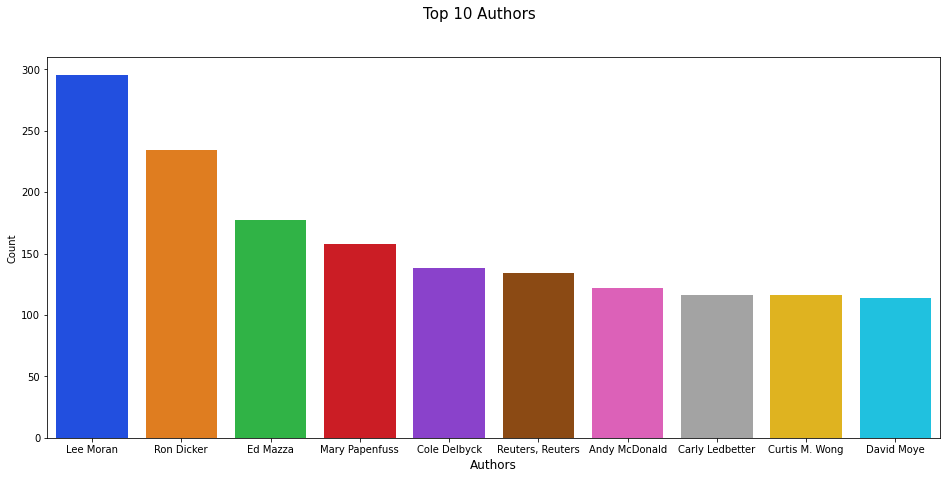

In [77]:
plt.figure(figsize=(16,7))
sns.barplot(data=df.authors.value_counts().reset_index()[1:11],x='index',y='authors',palette='bright')
plt.xlabel('Authors',fontsize=12)
plt.ylabel("Count")
plt.suptitle('Top 10 Authors',fontsize=15)

In [78]:
# creating wordcloud for top3 category

#for POLITICS
politics=' '
for i in df[df['category']=='POLITICS']['short_description']:
    politics+=i

# for ENTERTAINMENT
entertainment=' '
for i in df[df['category']=='ENTERTAINMENT']['short_description']:
    entertainment+=i
    

# for WELLNESS
wellness=' '
for i in df[df['category']=='WELLNESS']['short_description']:
    wellness+=i
    

In [79]:
# preprocess before creating word cloud
politics=simple_preprocess(politics)
entertainment=simple_preprocess(entertainment)
wellness=simple_preprocess(wellness)               #NOTE: simple perprocess does not remove stopwords

# so let's remove stopwords
politics=[i for i in politics if i not in stopwords.words('english')]
wellness=[i for i in wellness if i not in stopwords.words('english')]
entertainment=[i for i in entertainment if i not in stopwords.words('english')]

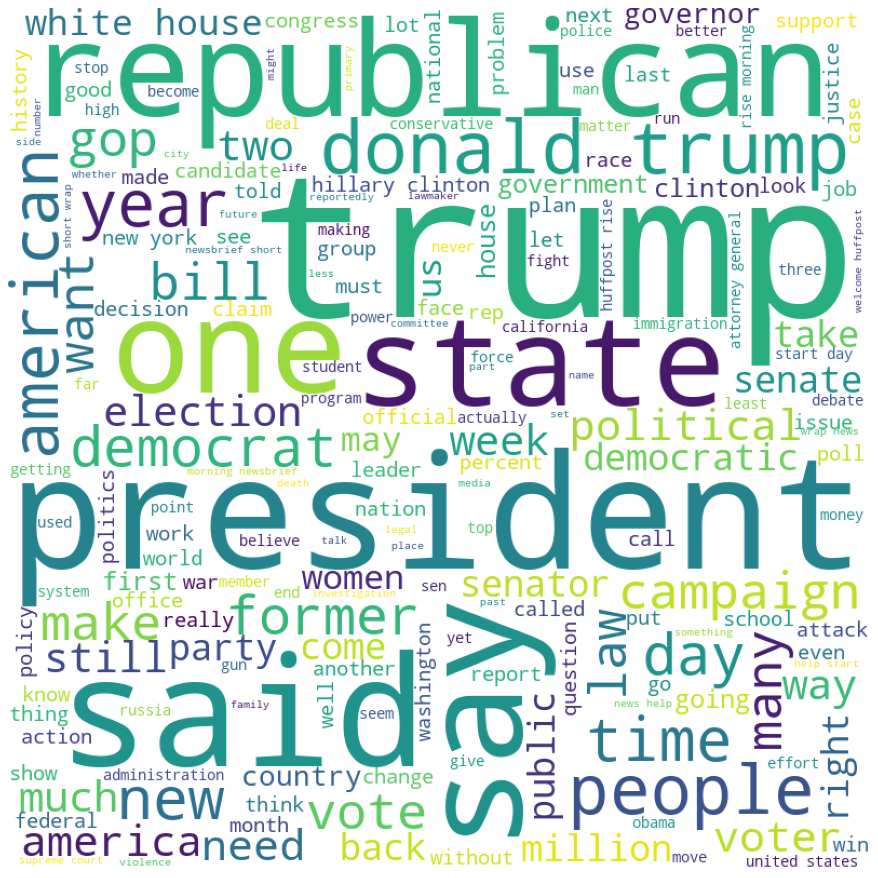

In [80]:
# Let's create and plot wordcloud for politics

#create
politics_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(politics))


#plot
plt.figure(figsize = (20, 12), facecolor = None)
plt.imshow(politics_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

            The size of the words represents the frequency of words in the corpus.

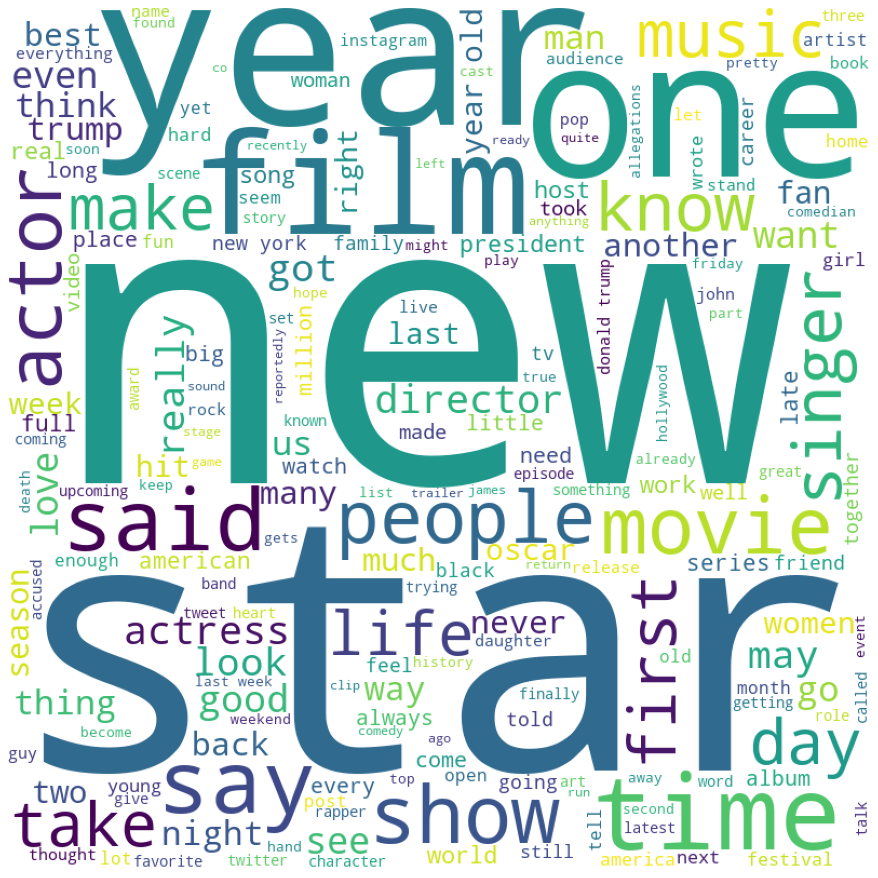

In [81]:
# Let's create and plot wordcloud for entertainment

#create
entertainment_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(entertainment))


#plot
plt.figure(figsize = (20, 12), facecolor = None)
plt.imshow(entertainment_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

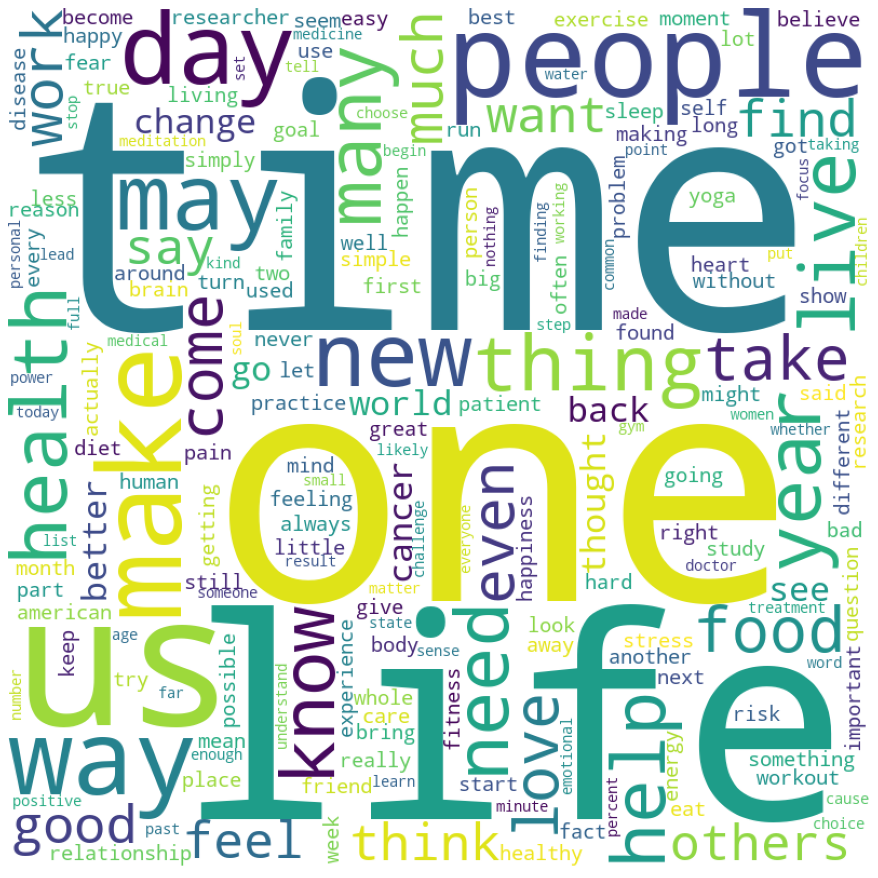

In [82]:
# Let's create and plot wordcloud for wellness

#create
wellness_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(wellness))


#plot
plt.figure(figsize = (20, 12), facecolor = None)
plt.imshow(wellness_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Data Preprocessing 

In [83]:
#null values
df.isna().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [84]:
# duplicates
df.duplicated().sum()

0

In [85]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [86]:
# lower case

#category
df['category']=df['category'].apply(lambda x:x.lower())

#short_descritption
df['short_description']=df['short_description'].apply(lambda x:x.lower())

# authors
df['authors']=df['authors'].apply(lambda x :x.lower())

In [87]:
# punctuation remove

# short_description
df['short_description']=df['short_description'].apply(lambda x:''.join([ i for i in x if i not in string.punctuation]))

# authors
df['authors']=df['authors'].apply(lambda x:''.join([ i for i in x if i not in string.punctuation]))

#category
df['category']=df['category'].apply(lambda x :''.join([ i for i in x if i not in string.punctuation]))


In [88]:
# Now let's remove stopwords
df['short_description']=df['short_description'].apply(lambda x:' '.join([i for i in x.split() if i not in stopwords.words('english')]))

In [89]:
# Stemming
stemmer=PorterStemmer()

# let's stem
df['short_description']=df['short_description'].apply(lambda x:' '.join([stemmer.stem(i) for i in x.split()]))

In [90]:
# let's join all the feature that we are going to use 
df['final']=[df['category'][i]+' '+df['short_description'][i]+' '+df['authors'][i] for i in df.index]

# Text Vectorization

In [91]:
# vectorizer
vectorizer=TfidfVectorizer(max_features=3000)

#let's vectorize
arry=vectorizer.fit_transform(df['final']).toarray()

# Cosine Similarity

In [117]:
#calculating similarity
corr=cosine_similarity(arry)

In [118]:
#saving into dataframe
corr=pd.DataFrame(corr,columns=df.headline,index=df.headline)

# Let's make Recommender System

In [177]:
def recommend_me(inp):
    index=corr[inp].sort_values(ascending=False)[1:5].index
    get_link=df[df['headline'].isin(index)].loc[:,['category','headline','link']]
    
    for i in get_link.index:
        print('Topic         : {}  \nCategory      : {} \nArticle_link  : {}\n\n'.format(get_link['headline'][i],get_link['category'][i],get_link['link'][i]))

**Let's test**


In [178]:
# testing model
recommend_me("Jeremy Collins Wins 'Survivor: Second Chance'")

Topic         : Jeremy Collins Wins 'Survivor: Second Chance'  
Category      : entertainment 
Article_link  : https://www.huffingtonpost.com/entry/survivor-second-chance-winner_us_5671c5cee4b0648fe301f63f


Topic         : The Most Star-Studded Couples Dinner Date Ever?  
Category      : entertainment 
Article_link  : https://www.huffingtonpost.com/entry/ben-affleck-jennifer-garner-date-night_n_6153724.html


Topic         : 13 Reasons To Be Proud Of Being A Netflix Enthusiast  
Category      : entertainment 
Article_link  : https://www.huffingtonpost.com/entry/reasons-to-be-proud-of-being-a-netflix-binge-watcher_us_56bb6b98e4b08ffac1237530


Topic         : Taylor Swift Surprises Everyone With Darling Appearance At The CMAs  
Category      : entertainment 
Article_link  : https://www.huffingtonpost.com/entry/taylor-swift-surprises-everyone-with-darling-appearance-at-the-cmas_us_581a99bee4b0c43e6c1e0c16




           Working Well!

In [169]:
#choose any from here and test
[i for i in df.headline]

['Minnesota Boy Dies From Brain Infection After Swimming In Lake',
 "Jesse Williams Has A Message For Americans Who Say They Aren't Voting",
 'U.S. Transportation Remains Almost Entirely Reliant On Oil (VIDEO)',
 'Top 5 List of the Best, Good-for-You Halloween Candy (Psst... GMOs Are Not Invited)',
 "Jeremy Collins Wins 'Survivor: Second Chance'",
 'A Poem In Praise of the Exuberant',
 'Theresa May To Form Fragile Government After Shock Election Debacle',
 "Nick Viall (Yes, That's Correct) Is The New 'Bachelor'",
 '‘I Am Legend’ Screenwriter Debunks Vaccine Conspiracy Involving Film Once And For All',
 'Democratic Governors Make 11th-Hour Plea To Save Obamacare',
 'Marriage Advice: How To Take The Stress Out Of Your Relationship',
 'Can You Hear Me Now?',
 'The Creepiest Films Of 2014',
 'Republican Congressman All But Closes Door On Voting For Paul Ryan',
 "Package Thief Gets A Painful Dose Of Instant Karma, And It's All Caught On Video",
 'A Tribute to My Mother on Her 70th Birthday'